# TBD: Thoughts 
- maybe focus just on beginning and ending months somehow? 
- Capturing start and end months with a 0 or 1? What about the after effects? 
- Is this enough information in the reduced DF? Could add the state fragility matrix, other types of state failure
    - http://www.systemicpeace.org/inscrdata.html
- Stock market data is so...daily, this is a discontinuity, how to show/would there be correlation given the noise of day to day stock changes? Smoothing out the noise is a thing I guess?
- - Any overlapping regime changes in a year(multiple regime changes in a year)?
- 19 years out of 92 cumulative in the 2000s(where I have stock data) were still ongoing on collection - TBD: How to deal with these years, coding of 99 would skew analysis
-  Is the country one hot encoding necessary with columns for each MAG on each country?
- What about regimes in transition as of 2000?
- Look into geocoding/geopandas

# Ideas:
- Starting with just the average(MAGAVE)
- Drop country dummy var
- Save merged df to csv

# Goals:
- EDA of concurrent events vs. stock price
- One model 
    - For stock prices
       - For univariate
          - Including exogenous

## What is the minimal viable product and process/outline for this project?
- One model that considers the regime changes
    - Preferably it does better than baseline

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#TBD:-Thoughts" data-toc-modified-id="TBD:-Thoughts-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>TBD: Thoughts</a></span></li><li><span><a href="#Ideas:" data-toc-modified-id="Ideas:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ideas:</a></span></li><li><span><a href="#Goals:" data-toc-modified-id="Goals:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Goals:</a></span><ul class="toc-item"><li><span><a href="#What-is-the-minimal-viable-product-and-process/outline-for-this-project?" data-toc-modified-id="What-is-the-minimal-viable-product-and-process/outline-for-this-project?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>What is the minimal viable product and process/outline for this project?</a></span></li></ul></li><li><span><a href="#Survival-Analysis-of-Adverse-Regime-Changes:" data-toc-modified-id="Survival-Analysis-of-Adverse-Regime-Changes:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Survival Analysis of Adverse Regime Changes:</a></span></li><li><span><a href="#Imports-and-reading-in-data" data-toc-modified-id="Imports-and-reading-in-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Imports and reading in data</a></span></li><li><span><a href="#EDA-and-Preprocessing" data-toc-modified-id="EDA-and-Preprocessing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>EDA and Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Notes:" data-toc-modified-id="Notes:-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Notes:</a></span><ul class="toc-item"><li><span><a href="#Columns-to-drop:" data-toc-modified-id="Columns-to-drop:-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Columns to drop:</a></span></li><li><span><a href="#Columns-to-engineer:" data-toc-modified-id="Columns-to-engineer:-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Columns to engineer:</a></span></li><li><span><a href="#Single-missing-value-in-MAGCOL-(-9-=-missing-per-codebook)" data-toc-modified-id="Single-missing-value-in-MAGCOL-(-9-=-missing-per-codebook)-6.1.3"><span class="toc-item-num">6.1.3&nbsp;&nbsp;</span>Single missing value in MAGCOL ( 9 = missing per codebook)</a></span></li><li><span><a href="#TBD:-Not-sure-what-these-represent,-consult-codebook" data-toc-modified-id="TBD:-Not-sure-what-these-represent,-consult-codebook-6.1.4"><span class="toc-item-num">6.1.4&nbsp;&nbsp;</span>TBD: Not sure what these represent, consult codebook</a></span></li><li><span><a href="#86-Unique-Countries-in-dataset" data-toc-modified-id="86-Unique-Countries-in-dataset-6.1.5"><span class="toc-item-num">6.1.5&nbsp;&nbsp;</span>86 Unique Countries in dataset</a></span></li></ul></li><li><span><a href="#92-Regime-Change-Years-after-2000-because-I-only-have-access-to-stock-data-back-to-2000" data-toc-modified-id="92-Regime-Change-Years-after-2000-because-I-only-have-access-to-stock-data-back-to-2000-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>92 Regime Change Years after 2000 because I only have access to stock data back to 2000</a></span><ul class="toc-item"><li><span><a href="#Looking-at-discrete-events-2000-on:-30-different-events-in-26-countries-over-92-cumulative-years" data-toc-modified-id="Looking-at-discrete-events-2000-on:-30-different-events-in-26-countries-over-92-cumulative-years-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Looking at discrete events 2000 on: 30 different events in 26 countries over 92 cumulative years</a></span></li></ul></li><li><span><a href="#What's-this-spike-around-100?" data-toc-modified-id="What's-this-spike-around-100?-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>What's this spike around 100?</a></span></li><li><span><a href="#19-years-out-of-92-cumulative-in-the-2000s-were-still-ongoing-on-collection---TBD:-How-to-deal-with-these-years,-coding-of-99-would-skew-analysis" data-toc-modified-id="19-years-out-of-92-cumulative-in-the-2000s-were-still-ongoing-on-collection---TBD:-How-to-deal-with-these-years,-coding-of-99-would-skew-analysis-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>19 years out of 92 cumulative in the 2000s were still ongoing on collection - TBD: How to deal with these years, coding of 99 would skew analysis</a></span></li><li><span><a href="#Somalia,-you-okay-over-there?" data-toc-modified-id="Somalia,-you-okay-over-there?-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Somalia, you okay over there?</a></span></li><li><span><a href="#Dropping-columns:" data-toc-modified-id="Dropping-columns:-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Dropping columns:</a></span></li></ul></li><li><span><a href="#Focusing-on-duration---TBD:-Survival-analysis-derived-features-for-events-that-were-short/long-compared-to-the-estimated-time-to-death-event" data-toc-modified-id="Focusing-on-duration---TBD:-Survival-analysis-derived-features-for-events-that-were-short/long-compared-to-the-estimated-time-to-death-event-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Focusing on duration - TBD: Survival analysis derived features for events that were short/long compared to the estimated time to death event</a></span><ul class="toc-item"><li><span><a href="#Creating-'time_begin'-and-'time_end'-features" data-toc-modified-id="Creating-'time_begin'-and-'time_end'-features-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Creating 'time_begin' and 'time_end' features</a></span></li><li><span><a href="#Data-spans-1952-03-01-to-2018-12-01---TBD:-More-EDA" data-toc-modified-id="Data-spans-1952-03-01-to-2018-12-01---TBD:-More-EDA-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Data spans 1952-03-01 to 2018-12-01 - TBD: More EDA</a></span></li></ul></li><li><span><a href="#Stock-Data---Aerospace-and-Defense---focusing-on-one-stock-(LMT)-for-MVP" data-toc-modified-id="Stock-Data---Aerospace-and-Defense---focusing-on-one-stock-(LMT)-for-MVP-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Stock Data - Aerospace and Defense - focusing on one stock (LMT) for MVP</a></span><ul class="toc-item"><li><span><a href="#TBD:-Comparison-to-overall-market,-compensating-for-market-crash,-inflation,-other-stocks-including-not-in-ETF" data-toc-modified-id="TBD:-Comparison-to-overall-market,-compensating-for-market-crash,-inflation,-other-stocks-including-not-in-ETF-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>TBD: Comparison to overall market, compensating for market crash, inflation, other stocks including not in ETF</a></span></li></ul></li><li><span><a href="#Lockheed-Martin-Data" data-toc-modified-id="Lockheed-Martin-Data-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Lockheed Martin Data</a></span><ul class="toc-item"><li><span><a href="#Renaming-time-column(soon-to-be-index)-to-'d'-for-Prophet-examination-later" data-toc-modified-id="Renaming-time-column(soon-to-be-index)-to-'d'-for-Prophet-examination-later-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Renaming time column(soon to be index) to 'd' for Prophet examination later</a></span><ul class="toc-item"><li><span><a href="#--This-is-a-range-index-and-needs-converting-to-play-nice" data-toc-modified-id="--This-is-a-range-index-and-needs-converting-to-play-nice-9.1.1"><span class="toc-item-num">9.1.1&nbsp;&nbsp;</span>- This is a range index and needs converting to play nice</a></span></li></ul></li><li><span><a href="#Closing-price-charting-and-EDA" data-toc-modified-id="Closing-price-charting-and-EDA-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Closing price charting and EDA</a></span></li><li><span><a href="#Box-and-whisker" data-toc-modified-id="Box-and-whisker-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Box and whisker</a></span></li><li><span><a href="#Time-series-heat-map" data-toc-modified-id="Time-series-heat-map-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>Time series heat map</a></span></li><li><span><a href="#Lag-plot" data-toc-modified-id="Lag-plot-9.5"><span class="toc-item-num">9.5&nbsp;&nbsp;</span>Lag plot</a></span></li><li><span><a href="#PACF-ACF-Plots" data-toc-modified-id="PACF-ACF-Plots-9.6"><span class="toc-item-num">9.6&nbsp;&nbsp;</span>PACF ACF Plots</a></span></li><li><span><a href="#Adding-earliest-date-in-dataframe-to-beginning-of-AFG-time-series" data-toc-modified-id="Adding-earliest-date-in-dataframe-to-beginning-of-AFG-time-series-9.7"><span class="toc-item-num">9.7&nbsp;&nbsp;</span>Adding earliest date in dataframe to beginning of AFG time series</a></span></li><li><span><a href="#--How-would-I-forward-fill-and-backfill-these-values-given-there's-years-and-years-of-no-events-occurring(so-0s-in-MAGFAIL,-MAGCOL,-MAGVIOL,-MAGAVE,-etc.)" data-toc-modified-id="--How-would-I-forward-fill-and-backfill-these-values-given-there's-years-and-years-of-no-events-occurring(so-0s-in-MAGFAIL,-MAGCOL,-MAGVIOL,-MAGAVE,-etc.)-9.8"><span class="toc-item-num">9.8&nbsp;&nbsp;</span>- How would I forward fill and backfill these values given there's years and years of no events occurring(so 0s in MAGFAIL, MAGCOL, MAGVIOL, MAGAVE, etc.)</a></span></li></ul></li><li><span><a href="#A-possible-solution-with-expanded-dataframe--TBD:-Refactor-to-only-include-2000-on,-group-by-SCODE-instead-because-these-names-are-too-long" data-toc-modified-id="A-possible-solution-with-expanded-dataframe--TBD:-Refactor-to-only-include-2000-on,-group-by-SCODE-instead-because-these-names-are-too-long-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>A possible solution with expanded dataframe- TBD: Refactor to only include 2000 on, group by SCODE instead because these names are too long</a></span><ul class="toc-item"><li><span><a href="#Is-the-country-one-hot-encoding-necessary-with-columns-for-each-MAG-on-each-country?" data-toc-modified-id="Is-the-country-one-hot-encoding-necessary-with-columns-for-each-MAG-on-each-country?-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Is the country one hot encoding necessary with columns for each MAG on each country?</a></span></li></ul></li><li><span><a href="#Expanded-dataframe-with-values-by-country" data-toc-modified-id="Expanded-dataframe-with-values-by-country-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Expanded dataframe with values-by-country</a></span><ul class="toc-item"><li><span><a href="#Resampling-to-business-day-frequency-and-forward-filling" data-toc-modified-id="Resampling-to-business-day-frequency-and-forward-filling-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Resampling to business day frequency and forward filling</a></span></li></ul></li><li><span><a href="#Feature-Engineering---TBD" data-toc-modified-id="Feature-Engineering---TBD-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Feature Engineering - TBD</a></span></li><li><span><a href="#Adding-more-data---TBD:-Country/region-data-(region-as-a-one-hot,-population?,-GDP,-oil-production,-military-strength" data-toc-modified-id="Adding-more-data---TBD:-Country/region-data-(region-as-a-one-hot,-population?,-GDP,-oil-production,-military-strength-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Adding more data - TBD: Country/region data (region as a one-hot, population?, GDP, oil production, military strength</a></span><ul class="toc-item"><li><span><a href="#TBD:-EDA-and-Preprocess,-Feature-Engineering" data-toc-modified-id="TBD:-EDA-and-Preprocess,-Feature-Engineering-13.1"><span class="toc-item-num">13.1&nbsp;&nbsp;</span>TBD: EDA and Preprocess, Feature Engineering</a></span></li><li><span><a href="#Dropping-columns-of-all-0s" data-toc-modified-id="Dropping-columns-of-all-0s-13.2"><span class="toc-item-num">13.2&nbsp;&nbsp;</span>Dropping columns of all 0s</a></span></li><li><span><a href="#Trimming-LMT-data-to-just-2000-2019" data-toc-modified-id="Trimming-LMT-data-to-just-2000-2019-13.3"><span class="toc-item-num">13.3&nbsp;&nbsp;</span>Trimming LMT data to just 2000-2019</a></span></li></ul></li><li><span><a href="#Merging-LMT-stock-and-adverse-regime-change-data" data-toc-modified-id="Merging-LMT-stock-and-adverse-regime-change-data-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Merging LMT stock and adverse regime change data</a></span><ul class="toc-item"><li><span><a href="#Dropping-all-but-close-financial-data" data-toc-modified-id="Dropping-all-but-close-financial-data-14.1"><span class="toc-item-num">14.1&nbsp;&nbsp;</span>Dropping all but close financial data</a></span></li></ul></li><li><span><a href="#Creating-DF/TS-of-just-close-and-date" data-toc-modified-id="Creating-DF/TS-of-just-close-and-date-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Creating DF/TS of just close and date</a></span><ul class="toc-item"><li><span><a href="#Scaled-plot-of-mean-average-of-intensity-of-regime-collapses-with-close-price" data-toc-modified-id="Scaled-plot-of-mean-average-of-intensity-of-regime-collapses-with-close-price-15.1"><span class="toc-item-num">15.1&nbsp;&nbsp;</span>Scaled plot of mean average of intensity of regime collapses with close price</a></span></li></ul></li><li><span><a href="#EDA-of-stock-data---Lockheed-Martin" data-toc-modified-id="EDA-of-stock-data---Lockheed-Martin-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>EDA of stock data - Lockheed Martin</a></span><ul class="toc-item"><li><span><a href="#30-Day-Interval-Rolling-Mean-and-Std-Dev,-Close-Price-of-LMT" data-toc-modified-id="30-Day-Interval-Rolling-Mean-and-Std-Dev,-Close-Price-of-LMT-16.1"><span class="toc-item-num">16.1&nbsp;&nbsp;</span>30 Day Interval Rolling Mean and Std Dev, Close Price of LMT</a></span></li><li><span><a href="#Seasonal-decomposition---slight-upward-trend,-heavy-seasonality" data-toc-modified-id="Seasonal-decomposition---slight-upward-trend,-heavy-seasonality-16.2"><span class="toc-item-num">16.2&nbsp;&nbsp;</span>Seasonal decomposition - slight upward trend, heavy seasonality</a></span></li><li><span><a href="#Slicing-out-2014-on-for-visual-spot-check,-upward-trend" data-toc-modified-id="Slicing-out-2014-on-for-visual-spot-check,-upward-trend-16.3"><span class="toc-item-num">16.3&nbsp;&nbsp;</span>Slicing out 2014 on for visual spot check, upward trend</a></span></li><li><span><a href="#TBD:-Examine-by-time-slices" data-toc-modified-id="TBD:-Examine-by-time-slices-16.4"><span class="toc-item-num">16.4&nbsp;&nbsp;</span>TBD: Examine by time slices</a></span></li><li><span><a href="#TBD:-Smoothing-methods-plots" data-toc-modified-id="TBD:-Smoothing-methods-plots-16.5"><span class="toc-item-num">16.5&nbsp;&nbsp;</span>TBD: Smoothing methods plots</a></span></li><li><span><a href="#TBD:-ACF-and-PACF" data-toc-modified-id="TBD:-ACF-and-PACF-16.6"><span class="toc-item-num">16.6&nbsp;&nbsp;</span>TBD: ACF and PACF</a></span></li><li><span><a href="#Anomaly-plotting---looks-to-line-up-with-mean-ave-some" data-toc-modified-id="Anomaly-plotting---looks-to-line-up-with-mean-ave-some-16.7"><span class="toc-item-num">16.7&nbsp;&nbsp;</span>Anomaly plotting - looks to line up with mean ave some</a></span><ul class="toc-item"><li><span><a href="#TBD:-Add-as-feature(s)-outlier/inliers" data-toc-modified-id="TBD:-Add-as-feature(s)-outlier/inliers-16.7.1"><span class="toc-item-num">16.7.1&nbsp;&nbsp;</span>TBD: Add as feature(s) outlier/inliers</a></span></li></ul></li></ul></li><li><span><a href="#EDA-of-merged-regime-change-variables" data-toc-modified-id="EDA-of-merged-regime-change-variables-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>EDA of merged regime change variables</a></span></li><li><span><a href="#EDA-of-Country/Region-variables" data-toc-modified-id="EDA-of-Country/Region-variables-18"><span class="toc-item-num">18&nbsp;&nbsp;</span>EDA of Country/Region variables</a></span></li><li><span><a href="#Time-Series-Correlations" data-toc-modified-id="Time-Series-Correlations-19"><span class="toc-item-num">19&nbsp;&nbsp;</span>Time Series Correlations</a></span><ul class="toc-item"><li><span><a href="#Visual-spot-check" data-toc-modified-id="Visual-spot-check-19.1"><span class="toc-item-num">19.1&nbsp;&nbsp;</span>Visual spot check</a></span></li><li><span><a href="#Pearson-and-Spearman-Correlation-Comparisons" data-toc-modified-id="Pearson-and-Spearman-Correlation-Comparisons-19.2"><span class="toc-item-num">19.2&nbsp;&nbsp;</span>Pearson and Spearman Correlation Comparisons</a></span><ul class="toc-item"><li><span><a href="#Matrices-and-Maps" data-toc-modified-id="Matrices-and-Maps-19.2.1"><span class="toc-item-num">19.2.1&nbsp;&nbsp;</span>Matrices and Maps</a></span></li></ul></li></ul></li><li><span><a href="#Modeling,-Forecasting-and-comparisons" data-toc-modified-id="Modeling,-Forecasting-and-comparisons-20"><span class="toc-item-num">20&nbsp;&nbsp;</span>Modeling, Forecasting and comparisons</a></span><ul class="toc-item"><li><span><a href="#Off-moving-averages-naively" data-toc-modified-id="Off-moving-averages-naively-20.1"><span class="toc-item-num">20.1&nbsp;&nbsp;</span>Off moving averages naively</a></span></li><li><span><a href="#Dealing-with-stationarity---differencing-and-lagging,-Augmented-Dickey-Fuller" data-toc-modified-id="Dealing-with-stationarity---differencing-and-lagging,-Augmented-Dickey-Fuller-20.2"><span class="toc-item-num">20.2&nbsp;&nbsp;</span>Dealing with stationarity - differencing and lagging, Augmented Dickey-Fuller</a></span></li><li><span><a href="#Granger-Causality" data-toc-modified-id="Granger-Causality-20.3"><span class="toc-item-num">20.3&nbsp;&nbsp;</span>Granger Causality</a></span></li><li><span><a href="#Baseline-Modeling-for-comparisons" data-toc-modified-id="Baseline-Modeling-for-comparisons-20.4"><span class="toc-item-num">20.4&nbsp;&nbsp;</span>Baseline Modeling for comparisons</a></span></li><li><span><a href="#ARIMA-Modeling" data-toc-modified-id="ARIMA-Modeling-20.5"><span class="toc-item-num">20.5&nbsp;&nbsp;</span>ARIMA Modeling</a></span><ul class="toc-item"><li><span><a href="#VAR,-VARIMA,-VARIMAX,-SARMIAX" data-toc-modified-id="VAR,-VARIMA,-VARIMAX,-SARMIAX-20.5.1"><span class="toc-item-num">20.5.1&nbsp;&nbsp;</span>VAR, VARIMA, VARIMAX, SARMIAX</a></span></li></ul></li><li><span><a href="#Monte-Carlos" data-toc-modified-id="Monte-Carlos-20.6"><span class="toc-item-num">20.6&nbsp;&nbsp;</span>Monte Carlos</a></span></li><li><span><a href="#Prophet" data-toc-modified-id="Prophet-20.7"><span class="toc-item-num">20.7&nbsp;&nbsp;</span>Prophet</a></span></li></ul></li><li><span><a href="#Finally:-Deep-Learning-with-LSTMs,-Embedding-of-Entities(Time2Vec),-Autoencoders-for-Anomaly-Detection,-Markov-Models" data-toc-modified-id="Finally:-Deep-Learning-with-LSTMs,-Embedding-of-Entities(Time2Vec),-Autoencoders-for-Anomaly-Detection,-Markov-Models-21"><span class="toc-item-num">21&nbsp;&nbsp;</span>Finally: Deep Learning with LSTMs, Embedding of Entities(Time2Vec), Autoencoders for Anomaly Detection, Markov Models</a></span></li><li><span><a href="#Interpretation:-SHAP/LIME/ELI5-etc" data-toc-modified-id="Interpretation:-SHAP/LIME/ELI5-etc-22"><span class="toc-item-num">22&nbsp;&nbsp;</span>Interpretation: SHAP/LIME/ELI5 etc</a></span></li><li><span><a href="#Appendix:-Financial-Techniques--Portfolio-Allocation,-etc." data-toc-modified-id="Appendix:-Financial-Techniques--Portfolio-Allocation,-etc.-23"><span class="toc-item-num">23&nbsp;&nbsp;</span>Appendix: Financial Techniques- Portfolio Allocation, etc.</a></span></li><li><span><a href="#WIP:" data-toc-modified-id="WIP:-24"><span class="toc-item-num">24&nbsp;&nbsp;</span>WIP:</a></span><ul class="toc-item"><li><span><a href="#Geographical-plotting-test---just-the-most-turbulent-year" data-toc-modified-id="Geographical-plotting-test---just-the-most-turbulent-year-24.1"><span class="toc-item-num">24.1&nbsp;&nbsp;</span>Geographical plotting test - just the most turbulent year</a></span></li><li><span><a href="#Survival-analysis---TO-DO:-By-country/region" data-toc-modified-id="Survival-analysis---TO-DO:-By-country/region-24.2"><span class="toc-item-num">24.2&nbsp;&nbsp;</span>Survival analysis - TO DO: By country/region</a></span><ul class="toc-item"><li><span><a href="#First-converting-time_begin-and-time_end-to-accepted-Lifelines-format" data-toc-modified-id="First-converting-time_begin-and-time_end-to-accepted-Lifelines-format-24.2.1"><span class="toc-item-num">24.2.1&nbsp;&nbsp;</span>First converting time_begin and time_end to accepted Lifelines format</a></span></li><li><span><a href="#Kaplan-Meier-Fitter" data-toc-modified-id="Kaplan-Meier-Fitter-24.2.2"><span class="toc-item-num">24.2.2&nbsp;&nbsp;</span>Kaplan Meier Fitter</a></span></li><li><span><a href="#NelsonAalenFitter-for-cumulative-hazard-function" data-toc-modified-id="NelsonAalenFitter-for-cumulative-hazard-function-24.2.3"><span class="toc-item-num">24.2.3&nbsp;&nbsp;</span>NelsonAalenFitter for cumulative hazard function</a></span></li><li><span><a href="#TO-DO:-implementing-right/left-censorship-of-birth/death-events-via.-groupby-country-and-time-resampling" data-toc-modified-id="TO-DO:-implementing-right/left-censorship-of-birth/death-events-via.-groupby-country-and-time-resampling-24.2.4"><span class="toc-item-num">24.2.4&nbsp;&nbsp;</span>TO DO: implementing right/left censorship of birth/death events via. groupby country and time resampling</a></span></li></ul></li></ul></li></ul></div>

# Survival Analysis of Adverse Regime Changes: 
- Dataset available at: http://www.systemicpeace.org/inscrdata.html
- Utilizing the fantastic Lifelines package for Survival Analysis and adapting examples from https://lifelines.readthedocs.io/en/latest/index.html
- Beginning EDA and survival analysis towards a study of regime changes' effects on the global market

# Imports and reading in data

In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import pandas as pd
from statsmodels.tsa.stattools import ccovf,ccf,periodogram
from statsmodels.tsa.stattools import adfuller,kpss,coint,bds,q_stat,grangercausalitytests,levinson_durbin
from statsmodels.tools.eval_measures import mse, rmse, meanabs

# Alternative:
# from sklearn.metrics import mean_squared_error

In [2]:
import matplotlib.style as style 

#because this is political science and i am tacky
style.use('fivethirtyeight')

In [3]:
df = pd.read_excel('PITF Adverse Regime Change 2018.xls', index_col=None) 

df

,COUNTRY,SCODE,CCODE,YEAR,MOBEGIN,YRBEGIN,MOEND,YREND,PTYPE,MAGFAIL,MAGCOL,MAGVIOL,MAGAVE,DESC,POLITYX,DESC2
0,Afghanistan,AFG,700,1978,4,1978,12,1979,3,2,1,4,2.5,In the wake of unrest stemming from the assass...,REV,1.0
1,Afghanistan,AFG,700,1979,4,1978,12,1979,3,2,1,4,2.5,NaN,NaN,NaN
2,Afghanistan,AFG,700,1992,4,1992,9,1996,3,4,1,4,3.0,Soviet-supported Najibullah regime falls after...,REV,1.0
3,Afghanistan,AFG,700,1993,4,1992,9,1996,3,4,1,4,3.0,NaN,NaN,NaN
4,Afghanistan,AFG,700,1994,4,1992,9,1996,3,4,1,4,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,Zambia,ZAM,551,1970,8,1968,12,1972,3,1,3,2,2.0,NaN,NaN,NaN
349,Zambia,ZAM,551,1971,8,1968,12,1972,3,1,3,2,2.0,NaN,NaN,NaN
350,Zambia,ZAM,551,1972,8,1968,12,1972,3,1,3,2,2.0,NaN,NaN,NaN
351,Zambia,ZAM,551,1996,11,1996,11,1996,3,1,2,1,1.5,Constitutional amendments in May 1996 disquali...,-5,1.0


# EDA and Preprocessing

- Variables specific to the Adverse Regime Change episodes are as follows:
    - MAGFAIL (1-numeric)
        - Scaled failure of State authority (range 1-4; 9=missing)
    - MAGCOL (1-numeric)
        - Scaled collapse of democratic institutions (range 1-4; 9=missing)
    - MAGVIOL (1-numeric)
        - Scaled violence associated with regime transition (range 1-4; 9=missing)
    - MAGAVE (1.1-numeric)
        - Average of the three magnitude scores (range 1-4.0; 9=missing)
    - POLITYX (4-alpha/numeric)
        - Indicator of the type/magnitude of regime change

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   COUNTRY  353 non-null    object 
 1   SCODE    353 non-null    object 
 2   CCODE    353 non-null    int64  
 3   YEAR     353 non-null    int64  
 4   MOBEGIN  353 non-null    int64  
 5   YRBEGIN  353 non-null    int64  
 6   MOEND    353 non-null    int64  
 7   YREND    353 non-null    int64  
 8   PTYPE    353 non-null    int64  
 9   MAGFAIL  353 non-null    int64  
 10  MAGCOL   353 non-null    int64  
 11  MAGVIOL  353 non-null    int64  
 12  MAGAVE   353 non-null    float64
 13  DESC     136 non-null    object 
 14  POLITYX  136 non-null    object 
 15  DESC2    136 non-null    float64
dtypes: float64(2), int64(10), object(4)
memory usage: 44.2+ KB


In [5]:
eda_df = df.copy()

In [6]:
from pandas_profiling import ProfileReport
profile = ProfileReport(eda_df, title="Pandas Profiling Report")

In [7]:
# profile.to_widgets()

## Notes:
- PTYPE has Constant Value "3" 
- DESC is missing along with POLITYX and DESC2 in 217 rows, this is due to (consulting the codebook) these cells only being filled in the case of the first year of a multiyear event
- Somalia is an outlier in occurrences, but is that total distinct regime changes or years under regime change?
- 1990s are common years, a hot trend to have adverse regime changes in the 1990s
- A lot of ending and beginning in the first month and last month of the year, pointing to how this was coded?
- Should do distributions of MAG columns at least
- Drop for now

### Columns to drop:
- PTYPE constant value
- DESC2 can be dropped as redundant to DESC
- SCODE is redundant to COUNTRY as is CCODE
- Drop DESC for now, can examine with NLP later

### Columns to engineer:
- YEAR needs to be resampled to Daily data somehow 
    - (groupby country --> resample with fill and inserts?)
- YR and MO BEGIN AND END can be made into time beginning and time ending
- MAGCOL, VIOL, FAIL, AVE need to be 
    - Interpolated
- POLITYX is Unsupported 
    - Needs to be recoded
    - Check what the values mean in codebook
    - And filled where NaN 

In [8]:
eda_df.columns

Index(['COUNTRY', 'SCODE', 'CCODE', 'YEAR', 'MOBEGIN', 'YRBEGIN', 'MOEND',
       'YREND', 'PTYPE', 'MAGFAIL', 'MAGCOL', 'MAGVIOL', 'MAGAVE', 'DESC',
       'POLITYX', 'DESC2'],
      dtype='object')

In [9]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   COUNTRY  353 non-null    object 
 1   SCODE    353 non-null    object 
 2   CCODE    353 non-null    int64  
 3   YEAR     353 non-null    int64  
 4   MOBEGIN  353 non-null    int64  
 5   YRBEGIN  353 non-null    int64  
 6   MOEND    353 non-null    int64  
 7   YREND    353 non-null    int64  
 8   PTYPE    353 non-null    int64  
 9   MAGFAIL  353 non-null    int64  
 10  MAGCOL   353 non-null    int64  
 11  MAGVIOL  353 non-null    int64  
 12  MAGAVE   353 non-null    float64
 13  DESC     136 non-null    object 
 14  POLITYX  136 non-null    object 
 15  DESC2    136 non-null    float64
dtypes: float64(2), int64(10), object(4)
memory usage: 44.2+ KB


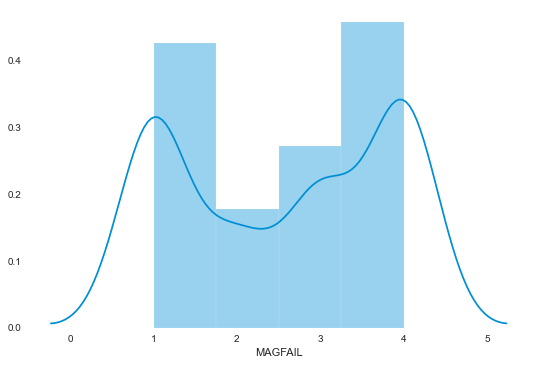

In [10]:
sns.distplot(eda_df['MAGFAIL'])

### Single missing value in MAGCOL ( 9 = missing per codebook)

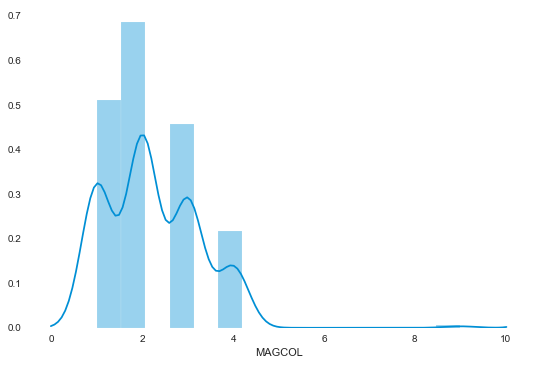

In [11]:
sns.distplot(eda_df['MAGCOL'])



In [12]:
eda_df['MAGCOL'].value_counts()

2    129
1     96
3     86
4     41
9      1
Name: MAGCOL, dtype: int64

In [13]:
eda_df = eda_df[eda_df['MAGCOL'] != 9]

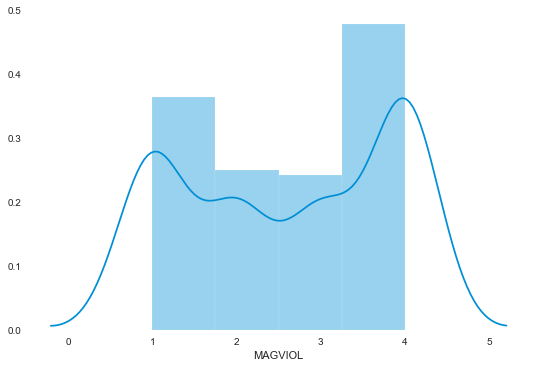

In [14]:
sns.distplot(eda_df['MAGVIOL'])

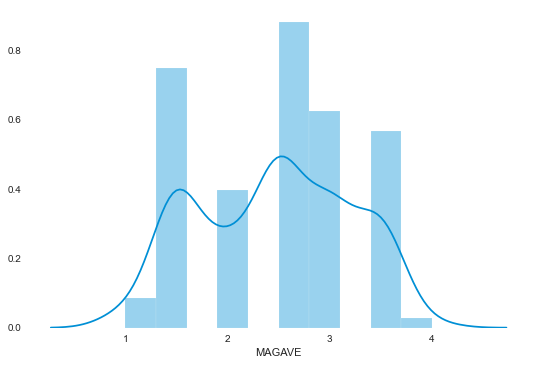

In [15]:
sns.distplot(eda_df['MAGAVE'])

### TBD: Not sure what these represent, consult codebook

In [16]:
eda_df.POLITYX.value_counts()

SF     26
-14    13
-9     12
-7     10
-15    10
-10     9
REV     9
-5      8
-11     8
-12     8
-6      5
-8      5
-13     5
DIS     5
-16     1
-18     1
Name: POLITYX, dtype: int64

### 86 Unique Countries in dataset

In [17]:
eda_df.COUNTRY.nunique()

85

## 92 Regime Change Years after 2000 because I only have access to stock data back to 2000

In [18]:
len(eda_df[eda_df['YEAR'] > 1999])

92

### Looking at discrete events 2000 on: 30 different events in 26 countries over 92 cumulative years

In [19]:
two_thou_df = eda_df[eda_df['YEAR'] > (1999 or np.nan)] 

In [20]:
two_thou_df.head(10)

,COUNTRY,SCODE,CCODE,YEAR,MOBEGIN,YRBEGIN,MOEND,YREND,PTYPE,MAGFAIL,MAGCOL,MAGVIOL,MAGAVE,DESC,POLITYX,DESC2
7,Afghanistan,AFG,700,2001,11,2001,6,2002,3,4,1,4,3.0,As a result of coordinated attacks by militias...,SF,1.0
8,Afghanistan,AFG,700,2002,11,2001,6,2002,3,4,1,4,3.0,NaN,NaN,NaN
33,Bangladesh,BNG,771,2007,1,2007,1,2007,3,1,3,1,1.5,Increasing tensions between the ruling Banglad...,-14,1.0
34,Bangladesh,BNG,771,2018,2,2018,12,2018,3,1,3,1,1.5,Bangladeshi politics has long been characteriz...,-7,1.0
52,Burundi,BUI,516,2015,7,2015,7,2015,3,1,2,3,2.0,The ruling CNDD-FDD party announced on 25 Apri...,-7,1.0
56,Cambodia,CAM,811,2017,11,2017,11,2017,3,1,3,1,1.5,In the run up to parliamentary elections sched...,-6,1.0
57,Central African Republic,CEN,482,2003,3,2003,3,2003,3,1,3,3,2.5,Forces loyal to Gen. Bozize succeed in ousting...,-6,1.0
58,Central African Republic,CEN,482,2013,3,2013,4,2016,3,4,3,4,3.5,A coalition of Islamic militants calling itsel...,SF,1.0
59,Central African Republic,CEN,482,2014,3,2013,4,2016,3,4,3,4,3.5,NaN,NaN,NaN
60,Central African Republic,CEN,482,2015,3,2013,4,2016,3,3,2,2,2.5,NaN,NaN,NaN


In [21]:
len(two_thou_df)

92

In [22]:
len(two_thou_df[two_thou_df.DESC.notna()])

30

In [23]:
two_thou_df.COUNTRY.unique()

array(['Afghanistan', 'Bangladesh', 'Burundi', 'Cambodia',
       'Central African Republic', 'Comoros', 'Fiji', 'Guinea-Bissau',
       'Haiti', 'Iran', 'Iraq', 'Ivory Coast', 'Libya', 'Mauritania',
       'Madagascar', 'Mali', 'Nepal', 'Niger', 'Sierra Leone',
       'Solomon Islands', 'Somalia', 'South Sudan', 'Thailand', 'Turkey',
       'Ukraine', 'Venezuela', 'Yemen', 'Congo-Kinshasa'], dtype=object)

In [24]:
len(two_thou_df.COUNTRY.unique())

28

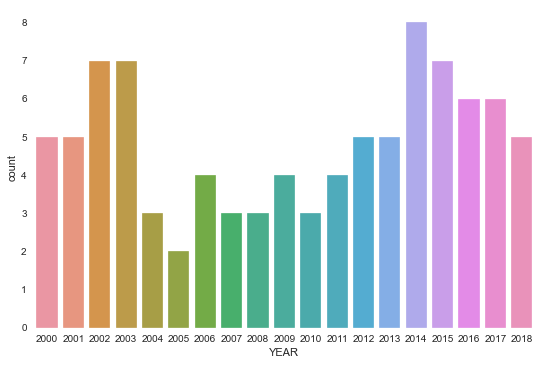

In [25]:
sns.countplot(two_thou_df.YEAR)

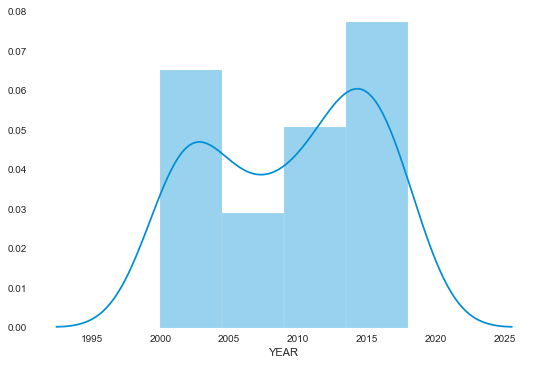

In [26]:
sns.distplot(two_thou_df.YEAR)

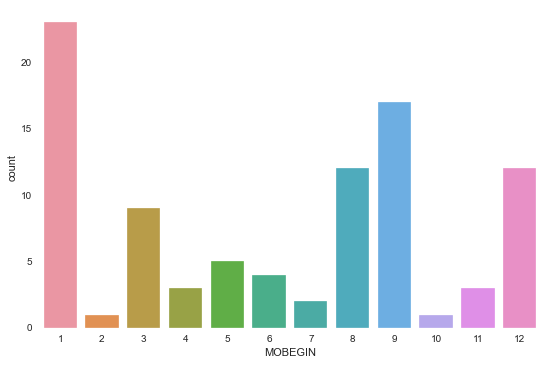

In [27]:
sns.countplot(two_thou_df.MOBEGIN)

## What's this spike around 100?

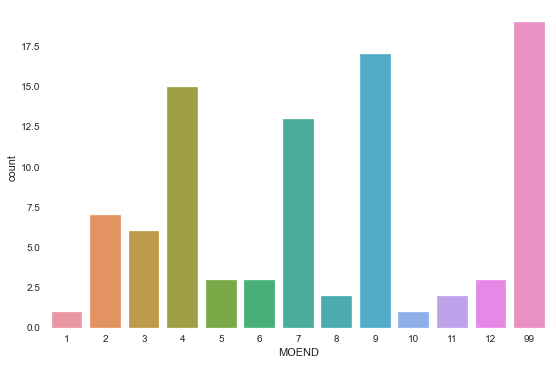

In [28]:
sns.countplot(two_thou_df.MOEND)

In [29]:
ninenine_df = two_thou_df[two_thou_df.MOEND == 99]

In [30]:
ninenine_df

,COUNTRY,SCODE,CCODE,YEAR,MOBEGIN,YRBEGIN,MOEND,YREND,PTYPE,MAGFAIL,MAGCOL,MAGVIOL,MAGAVE,DESC,POLITYX,DESC2
197,Libya,LIB,620,2011,8,2011,99,9999,3,4,1,4,3.0,Encouraged by popular uprisings in neighboring...,SF,1.0
198,Libya,LIB,620,2012,8,2011,99,9999,3,4,2,2,2.5,NaN,NaN,NaN
199,Libya,LIB,620,2013,8,2011,99,9999,3,4,2,2,2.5,NaN,NaN,NaN
200,Libya,LIB,620,2014,8,2011,99,9999,3,4,2,4,3.5,NaN,NaN,NaN
201,Libya,LIB,620,2015,8,2011,99,9999,3,3,2,4,3.0,NaN,NaN,NaN
202,Libya,LIB,620,2016,8,2011,99,9999,3,3,2,4,3.0,NaN,NaN,NaN
203,Libya,LIB,620,2017,8,2011,99,9999,3,3,2,4,3.0,NaN,NaN,NaN
204,Libya,LIB,620,2018,8,2011,99,9999,3,3,2,4,3.0,NaN,NaN,NaN
279,South Sudan,SSU,525,2013,12,2013,99,9999,3,4,2,4,3.5,A long-standing rivalry between President Salv...,SF,1.0
280,South Sudan,SSU,525,2014,12,2013,99,9999,3,4,2,4,3.5,NaN,NaN,NaN


## 19 years out of 92 cumulative in the 2000s were still ongoing on collection - TBD: How to deal with these years, coding of 99 would skew analysis

In [31]:
len(ninenine_df)

19

## Somalia, you okay over there?

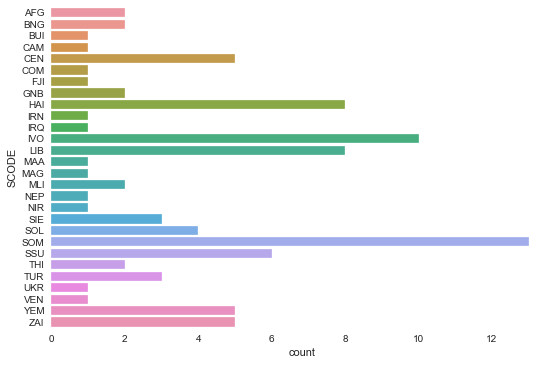

In [32]:
sns.countplot(y=two_thou_df['SCODE'])

## Dropping columns: 

In [33]:
eda_df = eda_df.drop(['PTYPE', 'DESC2', "COUNTRY", "CCODE", "DESC"],axis=1)

eda_df.columns

Index(['SCODE', 'YEAR', 'MOBEGIN', 'YRBEGIN', 'MOEND', 'YREND', 'MAGFAIL',
       'MAGCOL', 'MAGVIOL', 'MAGAVE', 'POLITYX'],
      dtype='object')

# Focusing on duration - TBD: Survival analysis derived features for events that were short/long compared to the estimated time to death event
- Time of beginning and end of regime change through YRBEGIN, YREND, MOBEGIN, MOEND features are of key interest

## Creating 'time_begin' and 'time_end' features
- These capture both month and year as Pandas datetime features
- Problem: Always set to first day of month, but that's the data for ya!

In [34]:
eda_df['time_begin'] = pd.to_datetime((eda_df['YRBEGIN'].astype(str)  + "-" +eda_df['MOBEGIN'].astype(str)), format='%Y-%m', errors="coerce")
eda_df['time_end'] = pd.to_datetime((eda_df['YREND'].astype(str)  + "-" +eda_df['MOEND'].astype(str)),  errors='coerce')
eda_df['YEAR'] = pd.to_datetime(eda_df['YEAR'].astype(str), errors="coerce")
eda_df.head(10)

,SCODE,YEAR,MOBEGIN,YRBEGIN,MOEND,YREND,MAGFAIL,MAGCOL,MAGVIOL,MAGAVE,POLITYX,time_begin,time_end
0,AFG,1978-01-01,4,1978,12,1979,2,1,4,2.5,REV,1978-04-01,1979-12-01
1,AFG,1979-01-01,4,1978,12,1979,2,1,4,2.5,NaN,1978-04-01,1979-12-01
2,AFG,1992-01-01,4,1992,9,1996,4,1,4,3.0,REV,1992-04-01,1996-09-01
3,AFG,1993-01-01,4,1992,9,1996,4,1,4,3.0,NaN,1992-04-01,1996-09-01
4,AFG,1994-01-01,4,1992,9,1996,4,1,4,3.0,NaN,1992-04-01,1996-09-01
5,AFG,1995-01-01,4,1992,9,1996,4,1,4,3.0,NaN,1992-04-01,1996-09-01
6,AFG,1996-01-01,4,1992,9,1996,2,1,2,1.5,NaN,1992-04-01,1996-09-01
7,AFG,2001-01-01,11,2001,6,2002,4,1,4,3.0,SF,2001-11-01,2002-06-01
8,AFG,2002-01-01,11,2001,6,2002,4,1,4,3.0,NaN,2001-11-01,2002-06-01
9,ALB,1996-01-01,5,1996,5,1996,1,3,1,1.5,-5,1996-05-01,1996-05-01


- Dropping source beginning and end date columns 

In [35]:
eda_df = eda_df.drop(['MOBEGIN','YRBEGIN','MOEND','YREND'],axis=1)

eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 352
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   SCODE       352 non-null    object        
 1   YEAR        352 non-null    datetime64[ns]
 2   MAGFAIL     352 non-null    int64         
 3   MAGCOL      352 non-null    int64         
 4   MAGVIOL     352 non-null    int64         
 5   MAGAVE      352 non-null    float64       
 6   POLITYX     135 non-null    object        
 7   time_begin  352 non-null    datetime64[ns]
 8   time_end    333 non-null    datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(3), object(2)
memory usage: 27.5+ KB


## Data spans 1952-03-01 to 2018-12-01 - TBD: More EDA

In [36]:
eda_df.time_begin.min()

Timestamp('1952-03-01 00:00:00')

In [37]:
eda_df.time_end.max()

Timestamp('2018-12-01 00:00:00')

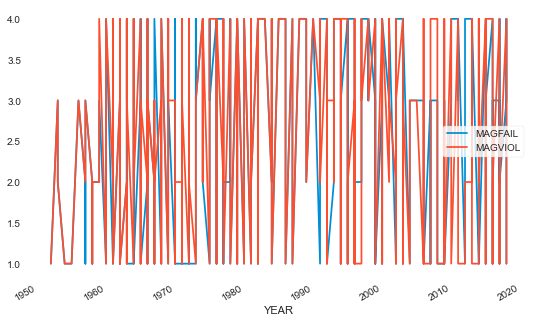

In [38]:
t_df = eda_df.copy()

t_df = t_df.set_index("YEAR")
#just messing around with plotting here
t_df[['MAGFAIL', "MAGVIOL"]].plot()

# Stock Data - Aerospace and Defense - focusing on one stock (LMT) for MVP
## TBD: Comparison to overall market, compensating for market crash, inflation, other stocks including not in ETF
- Based off the iShares US Aerospace and Defense ETF 

In [39]:
# in progress, only going to use companies that existed in 2000
#etf = {"BA": "Boeing", "RTX": "Raytheon", "LMT": "Lockheed Martin", "TDG": 'Transdigm Group'},
# "GD":"General Dynamics", "NOC":"Northtrop Grumman", "TDY": "Teledyne", "LHX": "L3Harris"}
# will include alpha vantage call?

# Lockheed Martin Data

In [40]:
# import io
# import os
# import csv
# urlData = response.content
#https://stackoverflow.com/questions/45978295/saving-a-downloaded-csv-file-using-python used

# with open('lmt.csv', 'w') as f:
#     writer = csv.writer(f)
#     for line in response.iter_lines():
#         writer.writerow(line.decode('utf-8').split(','))

lmt = pd.read_csv("lmt.csv")

lmt

,timestamp,open,high,low,close,volume
0,2020-07-09,348.00,349.4850,339.18,339.96,1820253.0
1,2020-07-08,353.50,357.3000,348.63,350.23,1962500.0
2,2020-07-07,362.59,362.9200,352.78,353.27,1394900.0
3,2020-07-06,366.48,367.1200,360.84,362.59,1202300.0
4,2020-07-02,363.53,366.0699,360.69,362.00,1395705.0
...,...,...,...,...,...,...
5041,2000-07-13,25.06,26.0600,25.00,25.00,836100.0
5042,2000-07-12,24.19,25.1900,24.19,25.06,521500.0
5043,2000-07-11,24.94,25.0600,24.56,24.75,620000.0
5044,2000-07-10,25.31,25.4400,25.00,25.19,612000.0


## Renaming time column(soon to be index) to 'd' for Prophet examination later

In [41]:
lmt.rename(columns={"timestamp":"d"},inplace=True)


### - This is a range index and needs converting to play nice

In [42]:
lmt.index

RangeIndex(start=0, stop=5046, step=1)

In [43]:
lmt = lmt.set_index(pd.to_datetime(lmt['d'])).sort_index()

lmt.index

DatetimeIndex(['2000-07-07', '2000-07-10', '2000-07-11', '2000-07-12',
               '2000-07-13', '2000-07-14', '2000-07-17', '2000-07-18',
               '2000-07-19', '2000-07-20',
               ...
                      'NaT',        'NaT',        'NaT',        'NaT',
                      'NaT',        'NaT',        'NaT',        'NaT',
                      'NaT',        'NaT'],
              dtype='datetime64[ns]', name='d', length=5046, freq=None)

## Closing price charting and EDA

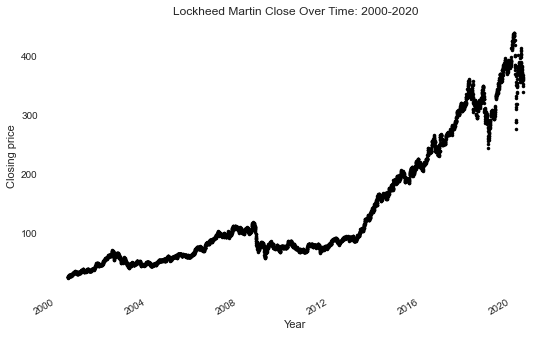

In [49]:
lmt['close'].plot(style='k.')
ax = plt.gca()
ax.set_title("Lockheed Martin Close Over Time: 2000-2020")
ax.set_xlabel("Year")
ax.set_ylabel("Closing price")
plt.savefig("lmttimeseries20002020.png")
plt.show()

In [50]:
lmt['close'].describe()

count    5033.000000
mean      137.604949
std       103.610883
min        24.750000
25%        62.910000
50%        88.210000
75%       202.120000
max       439.850000
Name: close, dtype: float64

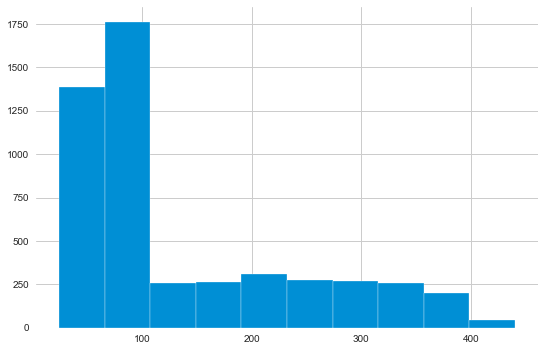

In [51]:
lmt['close'].hist()

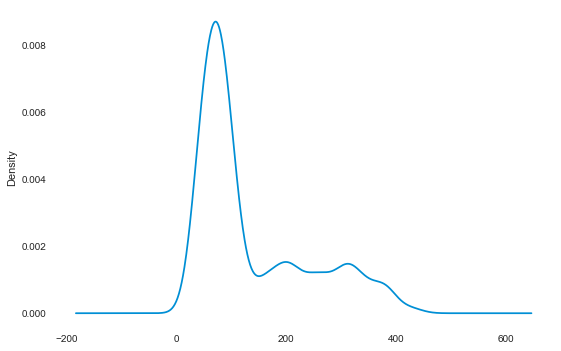

In [52]:
lmt['close'].plot(kind='kde')

## Box and whisker

## Time series heat map

## Lag plot

## PACF ACF Plots

## Adding earliest date in dataframe to beginning of AFG time series
- This means adding latest date in dataframe to each series is possible, but:
##    - How would I forward fill and backfill these values given there's years and years of no events occurring(so 0s in MAGFAIL, MAGCOL, MAGVIOL, MAGAVE, etc.)

# A possible solution with expanded dataframe- TBD: Refactor to only include 2000 on, group by SCODE instead because these names are too long
## Is the country one hot encoding necessary with columns for each MAG on each country?

In [53]:
#create copy of df at present state
group_df = eda_df.copy()

#drop non numeric columns
group_df = group_df.drop(["POLITYX", "time_begin","time_end"],axis=1)

# group by country into groupby object
group = group_df.groupby(["SCODE"])

In [54]:
from functools import reduce

#empty list of dataframes to be populated with groupby objects' dfs when modified
grouped_dfs = []

#iterate over groupby objects' component dataframes
for k in group.groups.keys():
    #reference to dataframe
    gr = group.get_group(k)

    #append 1950 and 2019 as beginning and end years
    gr = gr.append(pd.Series([k,'2019-01-01',0,0,0,0], index=gr.columns),ignore_index=True) #adding first year
    gr.loc[-1] = [k, '1950-01-01', 0,0,0,0]  # adding final year
    gr.index = gr.index + 1  # shifting index to match
    gr.sort_index(inplace=True) #sorting index back to sequential years
    
    #setting index to datetime YEAR with AS(year start) freq, fill empty years with 0
    gr =gr.set_index("YEAR").asfreq('AS')
    gr = gr.fillna(0)
        
    #dropping a weird column that comes up 
    gr = gr.drop('0', axis=1, errors='ignore')
    
    #renaming columns programmatically to not collide in merge, appending name of country to numerical vals
    gr.rename(columns = {'MAGFAIL':'MAGFAIL_'+k, "MAGCOL": "MAGCOL_"+k,"MAGAVE":"MAGAVE_"+k,"MAGVIOL": "MAGVIOL_"+k}, inplace = True)
    gr = gr.reset_index()
    
    #add iterated df to dfs list
    grouped_dfs.append(gr)

#merge all dfs on YEAR and set index back to datetime 
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['YEAR'],
                                            how='outer'), grouped_dfs).set_index("YEAR")

# Expanded dataframe with values-by-country

In [55]:
df_merged

,SCODE_x,MAGFAIL_AFG,MAGCOL_AFG,MAGVIOL_AFG,MAGAVE_AFG,SCODE_y,MAGFAIL_ALB,MAGCOL_ALB,MAGVIOL_ALB,MAGAVE_ALB,...,SCODE_x,MAGFAIL_ZAM,MAGCOL_ZAM,MAGVIOL_ZAM,MAGAVE_ZAM,SCODE_y,MAGFAIL_ZIM,MAGCOL_ZIM,MAGVIOL_ZIM,MAGAVE_ZIM
YEAR,,,,,,,,,,,,,,,,,,,,,
1950-01-01,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
1951-01-01,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
1952-01-01,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
1953-01-01,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
1954-01-01,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-01,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
2016-01-01,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
2017-01-01,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0


In [56]:
df_merged = df_merged.drop(columns=['SCODE_x', 'SCODE_y'],axis=1)

df_merged

,MAGFAIL_AFG,MAGCOL_AFG,MAGVIOL_AFG,MAGAVE_AFG,MAGFAIL_ALB,MAGCOL_ALB,MAGVIOL_ALB,MAGAVE_ALB,MAGFAIL_ALG,MAGCOL_ALG,...,MAGVIOL_ZAI,MAGAVE_ZAI,MAGFAIL_ZAM,MAGCOL_ZAM,MAGVIOL_ZAM,MAGAVE_ZAM,MAGFAIL_ZIM,MAGCOL_ZIM,MAGVIOL_ZIM,MAGAVE_ZIM
YEAR,,,,,,,,,,,,,,,,,,,,,
1950-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1951-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1952-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1953-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1954-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Resampling to business day frequency and forward filling

In [57]:
df_merged = df_merged.resample("B").ffill()
#"d" for daily
df_merged

,MAGFAIL_AFG,MAGCOL_AFG,MAGVIOL_AFG,MAGAVE_AFG,MAGFAIL_ALB,MAGCOL_ALB,MAGVIOL_ALB,MAGAVE_ALB,MAGFAIL_ALG,MAGCOL_ALG,...,MAGVIOL_ZAI,MAGAVE_ZAI,MAGFAIL_ZAM,MAGCOL_ZAM,MAGVIOL_ZAM,MAGAVE_ZAM,MAGFAIL_ZIM,MAGCOL_ZIM,MAGVIOL_ZIM,MAGAVE_ZIM
YEAR,,,,,,,,,,,,,,,,,,,,,
1949-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1950-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1950-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1950-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
df_merged.index = df_merged.index.rename("d")

In [59]:
df_merged

,MAGFAIL_AFG,MAGCOL_AFG,MAGVIOL_AFG,MAGAVE_AFG,MAGFAIL_ALB,MAGCOL_ALB,MAGVIOL_ALB,MAGAVE_ALB,MAGFAIL_ALG,MAGCOL_ALG,...,MAGVIOL_ZAI,MAGAVE_ZAI,MAGFAIL_ZAM,MAGCOL_ZAM,MAGVIOL_ZAM,MAGAVE_ZAM,MAGFAIL_ZIM,MAGCOL_ZIM,MAGVIOL_ZIM,MAGAVE_ZIM
d,,,,,,,,,,,,,,,,,,,,,
1949-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1950-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1950-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1950-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Engineering - TBD

# Adding more data - TBD: Country/region data (region as a one-hot, population?, GDP, oil production, military strength

## TBD: EDA and Preprocess, Feature Engineering

In [60]:
stock_regime_df = df_merged['2000-07-07':'2018-12-31']

stock_regime_df

,MAGFAIL_AFG,MAGCOL_AFG,MAGVIOL_AFG,MAGAVE_AFG,MAGFAIL_ALB,MAGCOL_ALB,MAGVIOL_ALB,MAGAVE_ALB,MAGFAIL_ALG,MAGCOL_ALG,...,MAGVIOL_ZAI,MAGAVE_ZAI,MAGFAIL_ZAM,MAGCOL_ZAM,MAGVIOL_ZAM,MAGAVE_ZAM,MAGFAIL_ZIM,MAGCOL_ZIM,MAGVIOL_ZIM,MAGAVE_ZIM
d,,,,,,,,,,,,,,,,,,,,,
2000-07-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-07-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-07-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-07-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-07-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
stock_regime_df

,MAGFAIL_AFG,MAGCOL_AFG,MAGVIOL_AFG,MAGAVE_AFG,MAGFAIL_ALB,MAGCOL_ALB,MAGVIOL_ALB,MAGAVE_ALB,MAGFAIL_ALG,MAGCOL_ALG,...,MAGVIOL_ZAI,MAGAVE_ZAI,MAGFAIL_ZAM,MAGCOL_ZAM,MAGVIOL_ZAM,MAGAVE_ZAM,MAGFAIL_ZIM,MAGCOL_ZIM,MAGVIOL_ZIM,MAGAVE_ZIM
d,,,,,,,,,,,,,,,,,,,,,
2000-07-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-07-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-07-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-07-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-07-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Dropping columns of all 0s

In [62]:
stock_regime_df = stock_regime_df.loc[:, (stock_regime_df != 0).any(axis=0)]

stock_regime_df

,MAGFAIL_AFG,MAGCOL_AFG,MAGVIOL_AFG,MAGAVE_AFG,MAGFAIL_BNG,MAGCOL_BNG,MAGVIOL_BNG,MAGAVE_BNG,MAGFAIL_BUI,MAGCOL_BUI,...,MAGVIOL_VEN,MAGAVE_VEN,MAGFAIL_YEM,MAGCOL_YEM,MAGVIOL_YEM,MAGAVE_YEM,MAGFAIL_ZAI,MAGCOL_ZAI,MAGVIOL_ZAI,MAGAVE_ZAI
d,,,,,,,,,,,,,,,,,,,,,
2000-07-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,2.5
2000-07-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,2.5
2000-07-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,2.5
2000-07-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,2.5
2000-07-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-25,0.0,0.0,0.0,0.0,1.0,3.0,1.0,1.5,0.0,0.0,...,0.0,0.0,4.0,3.0,4.0,3.5,0.0,0.0,0.0,0.0
2018-12-26,0.0,0.0,0.0,0.0,1.0,3.0,1.0,1.5,0.0,0.0,...,0.0,0.0,4.0,3.0,4.0,3.5,0.0,0.0,0.0,0.0
2018-12-27,0.0,0.0,0.0,0.0,1.0,3.0,1.0,1.5,0.0,0.0,...,0.0,0.0,4.0,3.0,4.0,3.5,0.0,0.0,0.0,0.0


## Trimming LMT data to just 2000-2019

In [63]:
trunc_lmt = lmt.copy()

In [64]:
trunc_lmt

,d,open,high,low,close,volume
d,,,,,,
2000-07-07,2000-07-07,25.13,25.38,24.81,25.31,744700.0
2000-07-10,2000-07-10,25.31,25.44,25.00,25.19,612000.0
2000-07-11,2000-07-11,24.94,25.06,24.56,24.75,620000.0
2000-07-12,2000-07-12,24.19,25.19,24.19,25.06,521500.0
2000-07-13,2000-07-13,25.06,26.06,25.00,25.00,836100.0
...,...,...,...,...,...,...
NaT,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
trunc_lmt = trunc_lmt['2000-07-07':'2019-01-01']

trunc_lmt

,d,open,high,low,close,volume
d,,,,,,
2000-07-07,2000-07-07,25.13,25.3800,24.8100,25.31,744700.0
2000-07-10,2000-07-10,25.31,25.4400,25.0000,25.19,612000.0
2000-07-11,2000-07-11,24.94,25.0600,24.5600,24.75,620000.0
2000-07-12,2000-07-12,24.19,25.1900,24.1900,25.06,521500.0
2000-07-13,2000-07-13,25.06,26.0600,25.0000,25.00,836100.0
...,...,...,...,...,...,...
2018-12-24,2018-12-24,253.03,254.6300,245.0100,245.22,1515428.0
2018-12-26,2018-12-26,246.31,251.8900,241.1796,251.62,1797958.0
2018-12-27,2018-12-27,249.25,259.7900,248.2000,259.79,2201422.0


In [67]:
trunc_lmt = trunc_lmt.asfreq("B")
trunc_lmt.index

DatetimeIndex(['2000-07-07', '2000-07-10', '2000-07-11', '2000-07-12',
               '2000-07-13', '2000-07-14', '2000-07-17', '2000-07-18',
               '2000-07-19', '2000-07-20',
               ...
               '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
               '2018-12-24', '2018-12-25', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='d', length=4822, freq='B')

# Merging LMT stock and adverse regime change data

In [69]:
lmt_df = pd.merge(trunc_lmt, stock_regime_df, left_index=True, right_index=True)

lmt_df

,d,open,high,low,close,volume,MAGFAIL_AFG,MAGCOL_AFG,MAGVIOL_AFG,MAGAVE_AFG,...,MAGVIOL_VEN,MAGAVE_VEN,MAGFAIL_YEM,MAGCOL_YEM,MAGVIOL_YEM,MAGAVE_YEM,MAGFAIL_ZAI,MAGCOL_ZAI,MAGVIOL_ZAI,MAGAVE_ZAI
d,,,,,,,,,,,,,,,,,,,,,
2000-07-07,2000-07-07,25.13,25.3800,24.8100,25.31,744700.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,2.5
2000-07-10,2000-07-10,25.31,25.4400,25.0000,25.19,612000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,2.5
2000-07-11,2000-07-11,24.94,25.0600,24.5600,24.75,620000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,2.5
2000-07-12,2000-07-12,24.19,25.1900,24.1900,25.06,521500.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,2.5
2000-07-13,2000-07-13,25.06,26.0600,25.0000,25.00,836100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-25,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,3.0,4.0,3.5,0.0,0.0,0.0,0.0
2018-12-26,2018-12-26,246.31,251.8900,241.1796,251.62,1797958.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,3.0,4.0,3.5,0.0,0.0,0.0,0.0
2018-12-27,2018-12-27,249.25,259.7900,248.2000,259.79,2201422.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,3.0,4.0,3.5,0.0,0.0,0.0,0.0


In [70]:
lmt_df.drop('d', axis=1, inplace=True)

lmt_df

,open,high,low,close,volume,MAGFAIL_AFG,MAGCOL_AFG,MAGVIOL_AFG,MAGAVE_AFG,MAGFAIL_BNG,...,MAGVIOL_VEN,MAGAVE_VEN,MAGFAIL_YEM,MAGCOL_YEM,MAGVIOL_YEM,MAGAVE_YEM,MAGFAIL_ZAI,MAGCOL_ZAI,MAGVIOL_ZAI,MAGAVE_ZAI
d,,,,,,,,,,,,,,,,,,,,,
2000-07-07,25.13,25.3800,24.8100,25.31,744700.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,2.5
2000-07-10,25.31,25.4400,25.0000,25.19,612000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,2.5
2000-07-11,24.94,25.0600,24.5600,24.75,620000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,2.5
2000-07-12,24.19,25.1900,24.1900,25.06,521500.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,2.5
2000-07-13,25.06,26.0600,25.0000,25.00,836100.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-25,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,4.0,3.0,4.0,3.5,0.0,0.0,0.0,0.0
2018-12-26,246.31,251.8900,241.1796,251.62,1797958.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,4.0,3.0,4.0,3.5,0.0,0.0,0.0,0.0
2018-12-27,249.25,259.7900,248.2000,259.79,2201422.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,4.0,3.0,4.0,3.5,0.0,0.0,0.0,0.0


In [71]:
lmt_df.index

DatetimeIndex(['2000-07-07', '2000-07-10', '2000-07-11', '2000-07-12',
               '2000-07-13', '2000-07-14', '2000-07-17', '2000-07-18',
               '2000-07-19', '2000-07-20',
               ...
               '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
               '2018-12-24', '2018-12-25', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='d', length=4822, freq='B')

In [73]:
ave_col = [col for col in lmt_df.columns if 'MAGAVE' in col]

ave_col

['MAGAVE_AFG',
 'MAGAVE_BNG',
 'MAGAVE_BUI',
 'MAGAVE_CAM',
 'MAGAVE_CEN',
 'MAGAVE_COM',
 'MAGAVE_FJI',
 'MAGAVE_GNB',
 'MAGAVE_HAI',
 'MAGAVE_IRN',
 'MAGAVE_IRQ',
 'MAGAVE_IVO',
 'MAGAVE_LIB',
 'MAGAVE_MAA',
 'MAGAVE_MAG',
 'MAGAVE_MLI',
 'MAGAVE_NEP',
 'MAGAVE_NIR',
 'MAGAVE_SIE',
 'MAGAVE_SOL',
 'MAGAVE_SOM',
 'MAGAVE_SSU',
 'MAGAVE_THI',
 'MAGAVE_TUR',
 'MAGAVE_UKR',
 'MAGAVE_VEN',
 'MAGAVE_YEM',
 'MAGAVE_ZAI']

In [74]:
lmt_df['mean_ave'] = lmt_df[ave_col].mean(axis=1)

lmt_df.head(10)

,open,high,low,close,volume,MAGFAIL_AFG,MAGCOL_AFG,MAGVIOL_AFG,MAGAVE_AFG,MAGFAIL_BNG,...,MAGAVE_VEN,MAGFAIL_YEM,MAGCOL_YEM,MAGVIOL_YEM,MAGAVE_YEM,MAGFAIL_ZAI,MAGCOL_ZAI,MAGVIOL_ZAI,MAGAVE_ZAI,mean_ave
d,,,,,,,,,,,,,,,,,,,,,
2000-07-07,25.13,25.38,24.81,25.31,744700.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,2.5,0.464286
2000-07-10,25.31,25.44,25.00,25.19,612000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,2.5,0.464286
2000-07-11,24.94,25.06,24.56,24.75,620000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,2.5,0.464286
2000-07-12,24.19,25.19,24.19,25.06,521500.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,2.5,0.464286
2000-07-13,25.06,26.06,25.00,25.00,836100.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,2.5,0.464286
2000-07-14,25.88,26.56,25.81,26.38,1902000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,2.5,0.464286
2000-07-17,26.50,26.50,25.25,25.38,1216800.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,2.5,0.464286
2000-07-18,25.50,25.50,24.94,25.31,1261200.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,2.5,0.464286
2000-07-19,25.25,25.44,24.88,25.38,900000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,2.5,0.464286


In [76]:
lmt_df.isnull().sum()

open           172
high           172
low            172
close          172
volume         172
              ... 
MAGFAIL_ZAI      0
MAGCOL_ZAI       0
MAGVIOL_ZAI      0
MAGAVE_ZAI       0
mean_ave         0
Length: 118, dtype: int64

In [77]:
lmt_df = lmt_df.dropna()

lmt_df.isnull().sum()

open           0
high           0
low            0
close          0
volume         0
              ..
MAGFAIL_ZAI    0
MAGCOL_ZAI     0
MAGVIOL_ZAI    0
MAGAVE_ZAI     0
mean_ave       0
Length: 118, dtype: int64

## Dropping all but close financial data

In [78]:
lmt_df = lmt_df.drop(columns=['open', 'high', 'low', 'volume'],axis=1)

lmt_df.head()

,close,MAGFAIL_AFG,MAGCOL_AFG,MAGVIOL_AFG,MAGAVE_AFG,MAGFAIL_BNG,MAGCOL_BNG,MAGVIOL_BNG,MAGAVE_BNG,MAGFAIL_BUI,...,MAGAVE_VEN,MAGFAIL_YEM,MAGCOL_YEM,MAGVIOL_YEM,MAGAVE_YEM,MAGFAIL_ZAI,MAGCOL_ZAI,MAGVIOL_ZAI,MAGAVE_ZAI,mean_ave
d,,,,,,,,,,,,,,,,,,,,,
2000-07-07,25.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,2.5,0.464286
2000-07-10,25.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,2.5,0.464286
2000-07-11,24.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,2.5,0.464286
2000-07-12,25.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,2.5,0.464286
2000-07-13,25.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,2.5,0.464286


# Creating DF/TS of just close and date

In [79]:
lmt_cl_df = lmt_df[['close']]

lmt_cl_df

,close
d,
2000-07-07,25.31
2000-07-10,25.19
2000-07-11,24.75
2000-07-12,25.06
2000-07-13,25.00
...,...
2018-12-24,245.22
2018-12-26,251.62
2018-12-27,259.79


In [81]:
lmt_cl_df.asfreq("B")

lmt_cl_df.index

DatetimeIndex(['2000-07-07', '2000-07-10', '2000-07-11', '2000-07-12',
               '2000-07-13', '2000-07-14', '2000-07-17', '2000-07-18',
               '2000-07-19', '2000-07-20',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='d', length=4650, freq=None)

In [82]:
lmt_cl_df.isnull().sum()

close    0
dtype: int64

## Scaled plot of mean average of intensity of regime collapses with close price

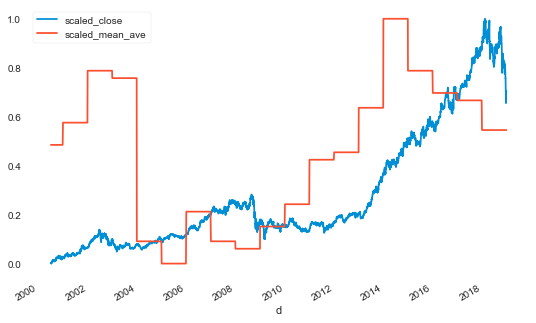

In [83]:
from sklearn.preprocessing import MinMaxScaler

scale_df = lmt_df.copy()
scaler = MinMaxScaler()
scale_df['scaled_close'] = scaler.fit_transform(lmt_df['close'].values.reshape(-1,1))
scale_df['scaled_mean_ave'] = scaler.fit_transform(lmt_df['mean_ave'].values.reshape(-1,1))

scale_df[['scaled_close', 'scaled_mean_ave']].plot()

plt.savefig("closevsmagave.png")

plt.show()

# EDA of stock data - Lockheed Martin

## 30 Day Interval Rolling Mean and Std Dev, Close Price of LMT

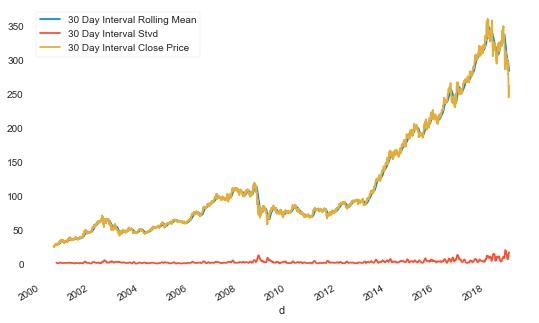

In [84]:
lmt_df.close.rolling(30).mean().plot(label="30 Day Interval Rolling Mean")
lmt_df.close.rolling(30).std().plot(label="30 Day Interval Stvd")
lmt_df.close.plot(label="30 Day Interval Close Price")
plt.legend()

## Seasonal decomposition - slight upward trend, heavy seasonality

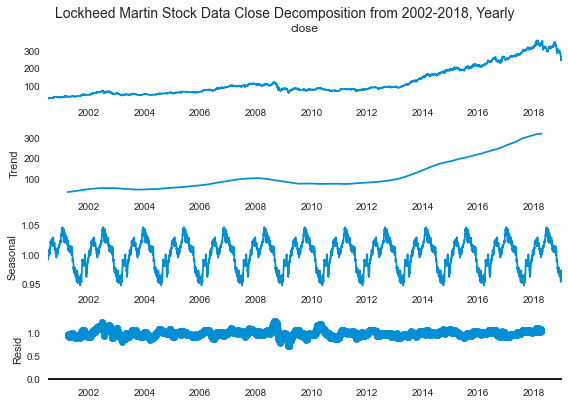

In [85]:
from statsmodels.tsa.seasonal import seasonal_decompose

dec = seasonal_decompose(lmt_df.close, period=365, model='mul')

fig= dec.plot()
plt.suptitle('Lockheed Martin Stock Data Close Decomposition from 2002-2018, Yearly',horizontalalignment='center', verticalalignment="bottom",fontsize=14)
plt.savefig("OG_timeseries.png")
plt.tight_layout()
plt.show()

## Slicing out 2014 on for visual spot check, upward trend

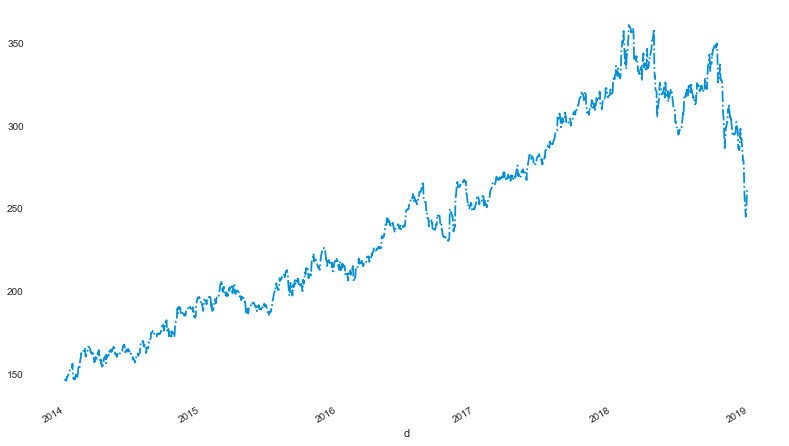

In [86]:
lmt_df['close']['2014-01-01':'2018-12-31'].plot(figsize=(12,8),ls='-.')
plt.show()

## TBD: Examine by time slices
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

In [ ]:
import statsmodels.api as sm

fig = sm.graphics.tsa.month_plot(lmt_cl_df)

## TBD: Smoothing methods plots

## TBD: ACF and PACF

## Anomaly plotting - looks to line up with mean ave some
### TBD: Add as feature(s) outlier/inliers

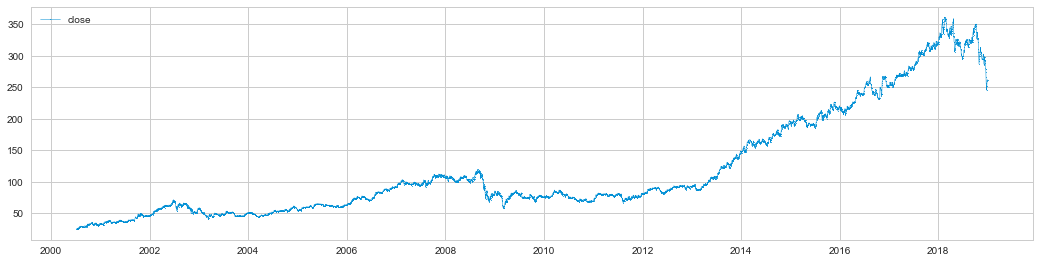

In [87]:
from adtk.visualization import plot

close = lmt_df.close
plot(close)

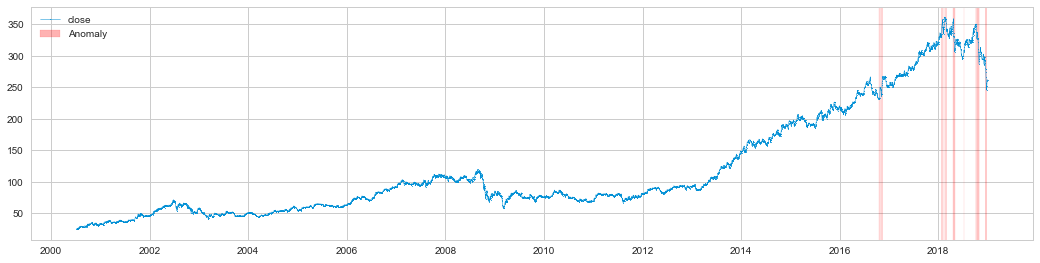

In [88]:
from adtk.detector import LevelShiftAD
level_shift_ad = LevelShiftAD(c=6.0, side='both', window=5)
anomalies = level_shift_ad.fit_detect(close)
plot(close, anomaly=anomalies, anomaly_color='red');

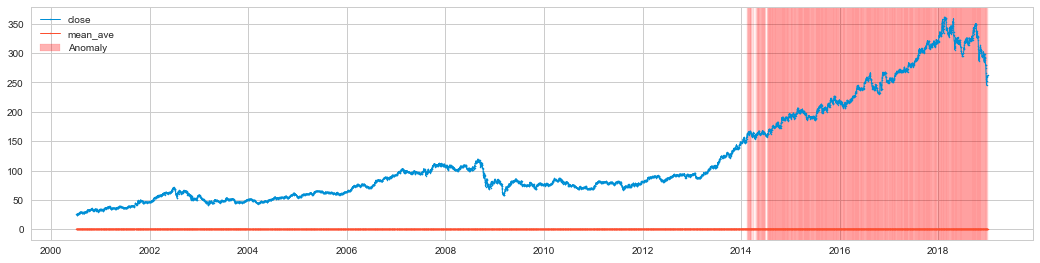

In [90]:
from adtk.detector import MinClusterDetector
from sklearn.cluster import KMeans
min_cluster_detector = MinClusterDetector(KMeans(n_clusters=2))
anomalies = min_cluster_detector.fit_detect(lmt_df[['close','mean_ave']])
plot(lmt_df[['close', 'mean_ave']], anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all')

# EDA of merged regime change variables

# EDA of Country/Region variables

# Time Series Correlations

## Visual spot check

## Pearson and Spearman Correlation Comparisons

### Matrices and Maps

# Modeling, Forecasting and comparisons

## Off moving averages naively

## Dealing with stationarity - differencing and lagging, Augmented Dickey-Fuller

## Granger Causality

## Baseline Modeling for comparisons

## ARIMA Modeling

### VAR, VARIMA, VARIMAX, SARMIAX

## Monte Carlos

## Prophet

# Finally: Deep Learning with LSTMs, Embedding of Entities(Time2Vec), Autoencoders for Anomaly Detection, Markov Models

# Interpretation: SHAP/LIME/ELI5 etc

# Appendix: Financial Techniques- Portfolio Allocation, etc.

# WIP: 

## Geographical plotting test - just the most turbulent year
- Code adapted from https://medium.com/datadriveninvestor/visualising-geospatial-data-with-python-d3b1c519f31

In [ ]:
# import folium
# import pandas as pd
# #Setting up the country co-ordinates
# country_geo = 'world-countries.json'

In [ ]:
# #looking for most common year to plot
# df.YEAR.value_counts()

In [ ]:
# crisis_year = 1996

# mask = df['YEAR'].isin([crisis_year])

# # apply our mask
# stage = df[mask]
# stage.head()

In [ ]:
# #Creating a data frame with just the country codes and the values we want plotted.
# data_to_plot = stage[['SCODE','MAGVIOL']]
# data_to_plot.head()

In [ ]:
# # Setup a folium map at a high-level zoom 
# map = folium.Map(location=[50, 0], zoom_start=1.25)

# # choropleth maps bind Pandas Data Frames and json geometries. 
# #This allows us to quickly visualize data combinations
# map.choropleth(geo_data=country_geo, data=data_to_plot,
#              columns=['SCODE', 'MAGVIOL'],
#              key_on='feature.id',
#              fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
#              legend_name='Magnitude of Violence out of 4 involved in Adverse Regime Change Event')

# map.save('index.html')
# # Import the Folium interactive html file


# from IPython.display import HTML
# HTML('<iframe src=index.html width=700 height=450></iframe>')

In [ ]:
# it is a surprise tool that will be useful later meme goes here
# from folium.plugins import TimeSliderChoropleth

## Survival analysis - TO DO: By country/region
### First converting time_begin and time_end to accepted Lifelines format

In [ ]:
# from lifelines.utils import datetimes_to_durations

# start_dates = dum_df['time_begin'].to_list()
# end_dates = dum_df['time_end'].to_list()

# T, E = datetimes_to_durations(start_dates, end_dates, freq="M")

In [ ]:
# start_dates

In [ ]:
# end_dates

### Kaplan Meier Fitter
- Estimate of the survival function, taking T as a random lifetime taken from population under study (time a couple is married, user time to enter a webpage - an infinite time if a user never does, etc.) that defines the probability of surviving past T
    - http://en.wikipedia.org/wiki/Kaplan%E2%80%93Meier_estimator

In [ ]:
# from lifelines import KaplanMeierFitter
# kmf = KaplanMeierFitter()
# kmf.fit(T, event_observed=E)

- Plotting results in months

In [ ]:
# kmf.survival_function_.plot()

- With confidence intervals

In [ ]:
# kmf.plot()
# plt.savefig("kmf_conf_plot.png")
# plt.show()

- Time at which 50% of regime changes will have ended

In [ ]:
# kmf.median_survival_time_

### NelsonAalenFitter for cumulative hazard function

In [ ]:
# from lifelines import NelsonAalenFitter
# naf = NelsonAalenFitter()

# naf.fit(T,event_observed=E)

In [ ]:
# print(naf.cumulative_hazard_.head())
# naf.plot()

### TO DO: implementing right/left censorship of birth/death events via. groupby country and time resampling